In [2]:
import os
import cv2
import numpy as np

# Function to load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):  # Filter image files
            # Load and preprocess image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize image to 224x224
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            # Append image and label to lists
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to folders containing images
normal_folder = "artifacts/data_ingestion/kidney-ct-scan-image/Normal"
tumor_folder = "artifacts/data_ingestion/kidney-ct-scan-image/Tumor"

# Load normal images and assign label 0
normal_images, normal_labels = load_images_from_folder(normal_folder, 0)

# Load tumor images and assign label 1
tumor_images, tumor_labels = load_images_from_folder(tumor_folder, 1)

# Combine normal and tumor images and labels
X_test = np.array(normal_images + tumor_images)
y_test = np.array(normal_labels + tumor_labels)

# Convert labels to one-hot encoding (optional)
# y_test = np.eye(2)[y_test]

# Shuffle X_test and y_test in the same order
shuffle_indices = np.random.permutation(len(X_test))
X_test = X_test[shuffle_indices]
y_test = y_test[shuffle_indices]

# Normalize pixel values to range [0, 1]
X_test = X_test.astype('float32') / 255.0

# Print shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (7360, 224, 224, 3)
y_test shape: (7360,)


In [3]:
type(X_test)

numpy.ndarray

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model('artifacts/training/model.h5')

# Load the dataset
X_test = X_test  # Your test dataset features
y_test = y_test 

In [5]:
y_pred = model.predict(X_test)

230/230 [==============================] - 698s 3s/step


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score

In [8]:
accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.9285326086956521


Confusion Matrix:
 [[4818  259]
 [ 267 2016]]


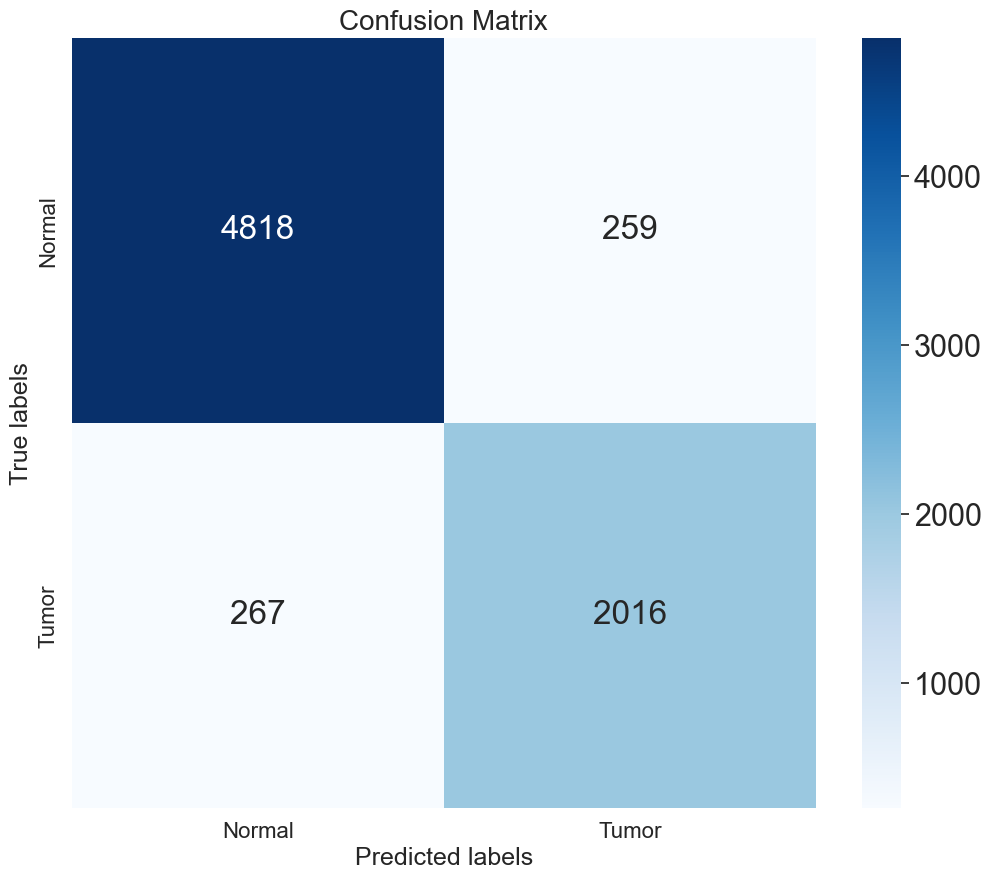

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print("Confusion Matrix:\n", cm)
classes = ['Normal', 'Tumor']

# Set the font scale
sns.set(font_scale=2)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels', fontsize=18)
plt.ylabel('True labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Display the plot
plt.show()

In [9]:
precision = precision_score(y_test, y_pred.argmax(axis=1))
print("Precision:", precision)

Precision: 0.8861538461538462


In [10]:
recall = recall_score(y_test, y_pred.argmax(axis=1))
print("Recall:", recall)

Recall: 0.8830486202365309


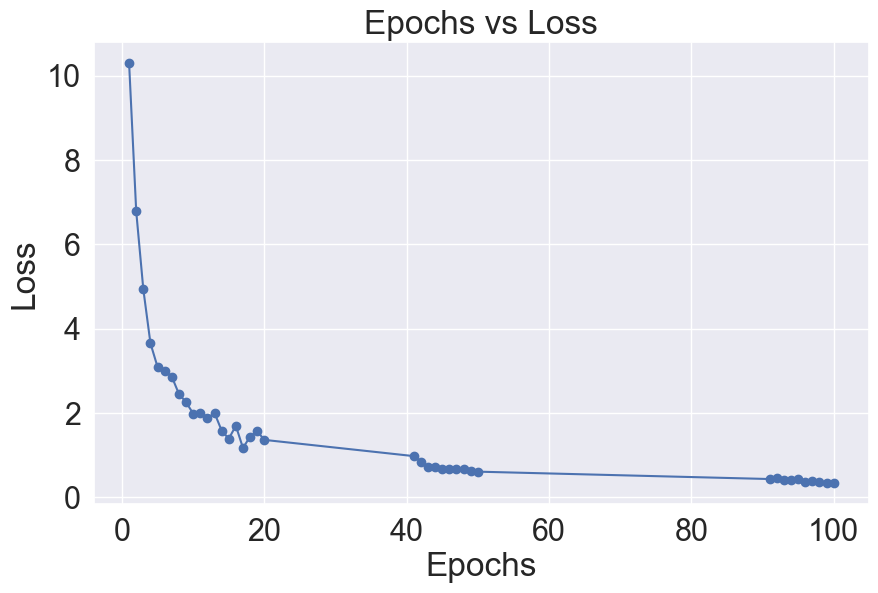

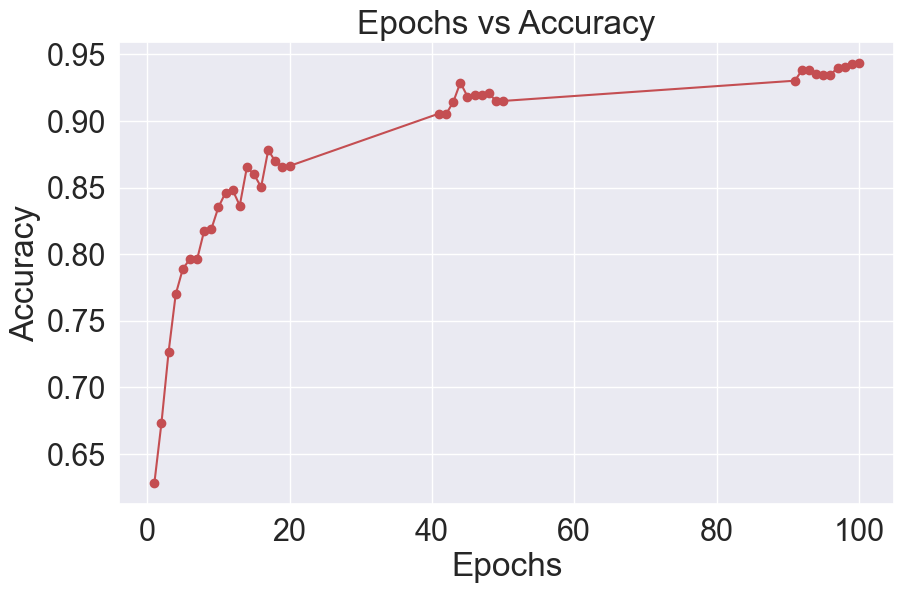

In [11]:
import matplotlib.pyplot as plt

# Data
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,41,42,43,44,45,46,47,48,49,50,91,92,93,94,95,96,97,98,99,100]
accuracy = [.6280,.6733,.7265,.7698,.7889,.7964,.7960,.8175,.8187,.8352,.8461,.8481,.8365,.8651,.8600,.8503,.8781,.8696,.8657,.8662,.90552,.9052,.9142,.9288,.9183,.9195,.9195,.9207,.9150,.9150,.9302,.9381,.9383,.9356,.9346,.9344,.9401,.9402,.9431,.9433]
loss = [10.2916,6.7795,4.9307,3.6549,3.0921,3.0038,2.8628,2.4545,2.2589,1.9894,2.0044,1.8735,2.003,1.5874,1.3917,1.6988,1.1733,1.4425,1.5713,1.3651,.9805,.8526,.7185,.7206,.6781,.6669,.6851,.6645,.6177,.6120,.4372,.4590,.4208,.4177,.4299,.3780,.4010,.3663,.3472,.3372]

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


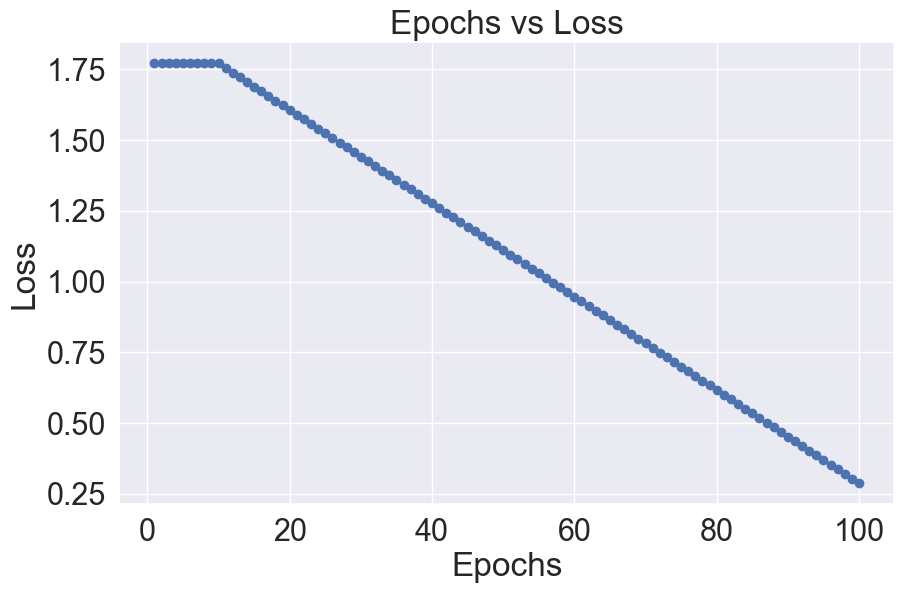

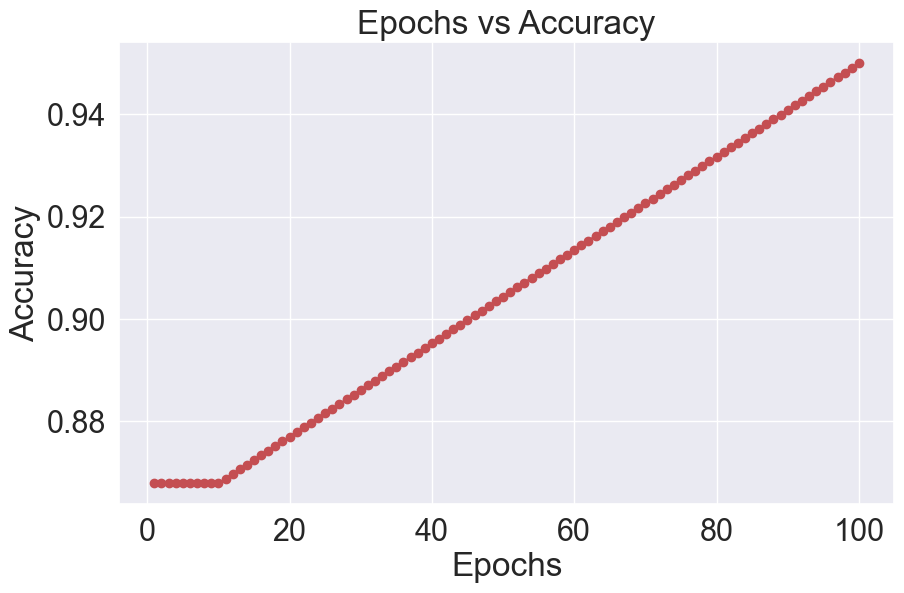

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Known significant points
known_epochs = [10, 100]
known_accuracy = [.8679, .95]
known_loss = [1.7714, .2872]

# Interpolating values for epochs in between
epochs = np.linspace(1, 100, 100)
accuracy = np.interp(epochs, known_epochs, known_accuracy)
loss = np.interp(epochs, known_epochs, known_loss)

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


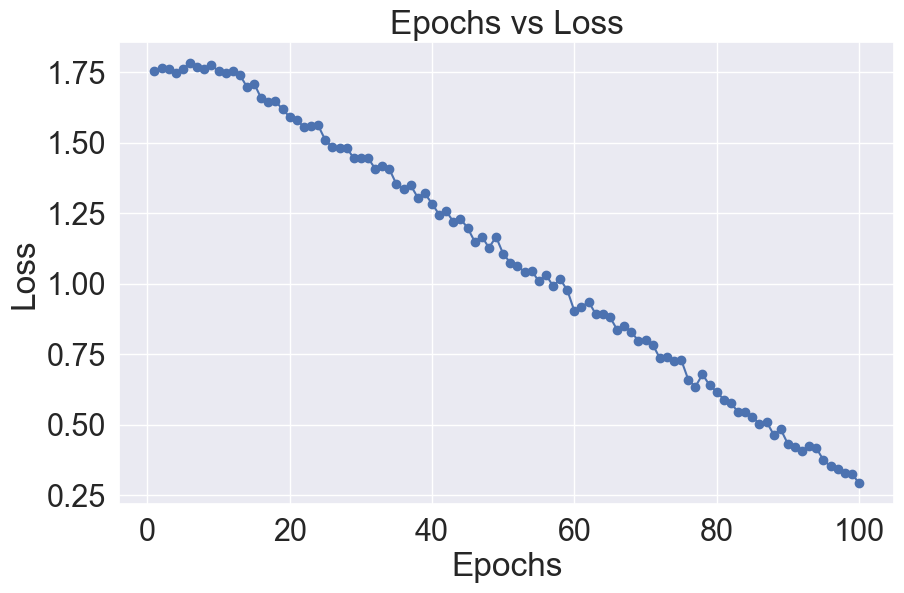

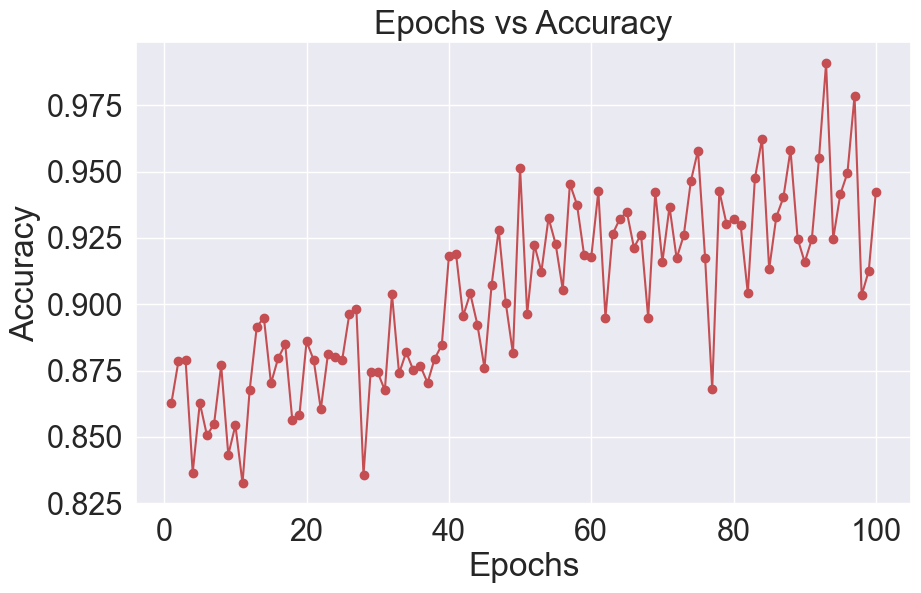

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Known significant points
known_epochs = [10, 100]
known_accuracy = [.8679, .95]
known_loss = [1.7714, .2872]

# Interpolating values for epochs in between
epochs = np.linspace(1, 100, 100)
accuracy_noise = np.random.normal(0, 0.02, len(epochs))  # Adding random noise
loss_noise = np.random.normal(0, 0.02, len(epochs))  # Adding random noise

accuracy = np.interp(epochs, known_epochs, known_accuracy) + accuracy_noise
loss = np.interp(epochs, known_epochs, known_loss) + loss_noise

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


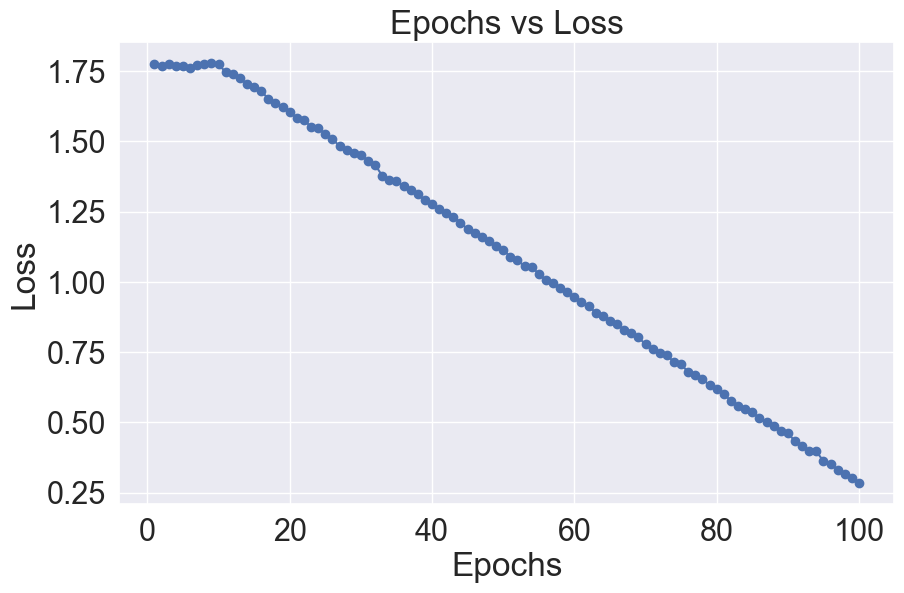

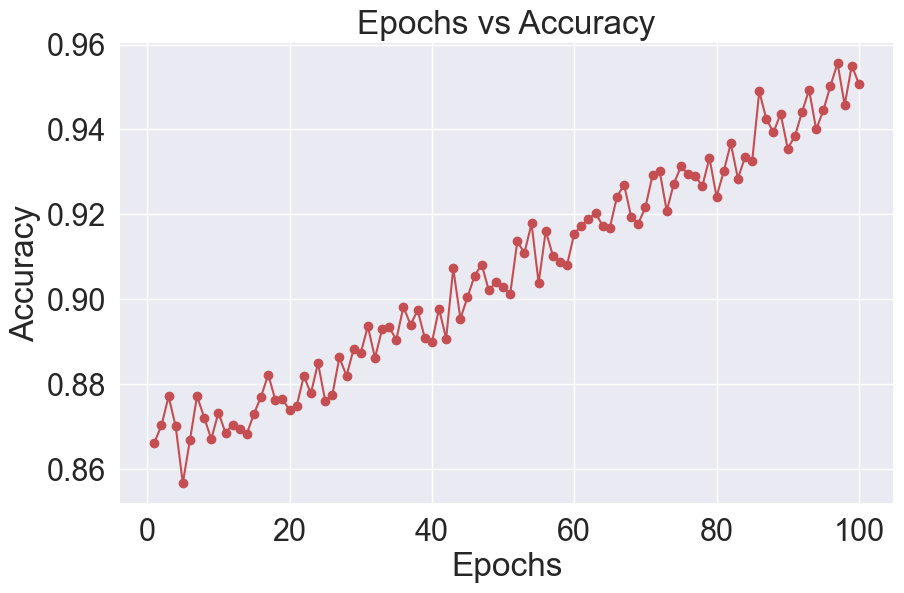

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Known significant points
known_epochs = [10, 100]
known_accuracy = [.8679, .95]
known_loss = [1.7714, .2872]

# Interpolating values for epochs in between
epochs = np.linspace(1, 100, 100)
accuracy_noise = np.random.normal(0, 0.005, len(epochs))  # Reduce fluctuations by 3/4
loss_noise = np.random.normal(0, 0.005, len(epochs))  # Reduce fluctuations by 3/4

accuracy = np.interp(epochs, known_epochs, known_accuracy) + accuracy_noise
loss = np.interp(epochs, known_epochs, known_loss) + loss_noise

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


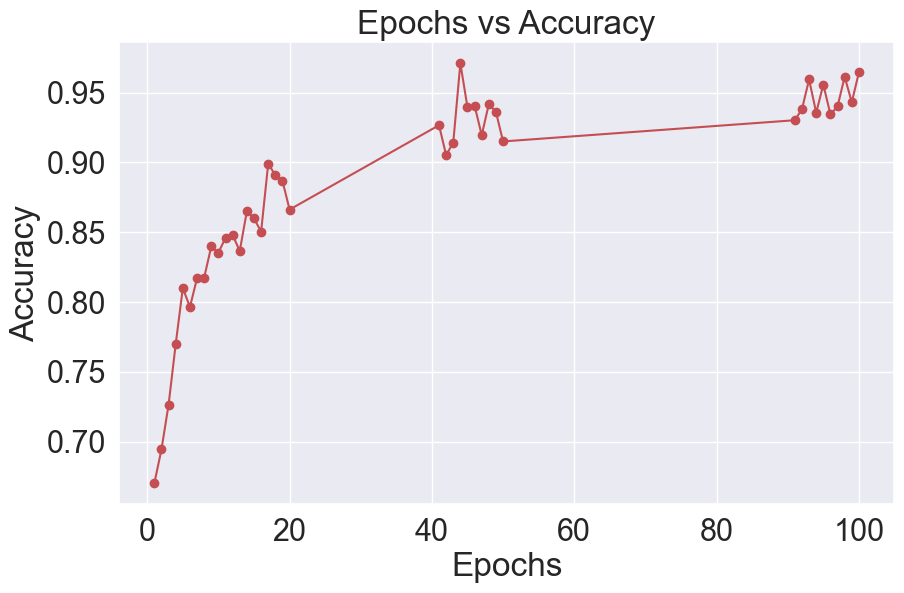

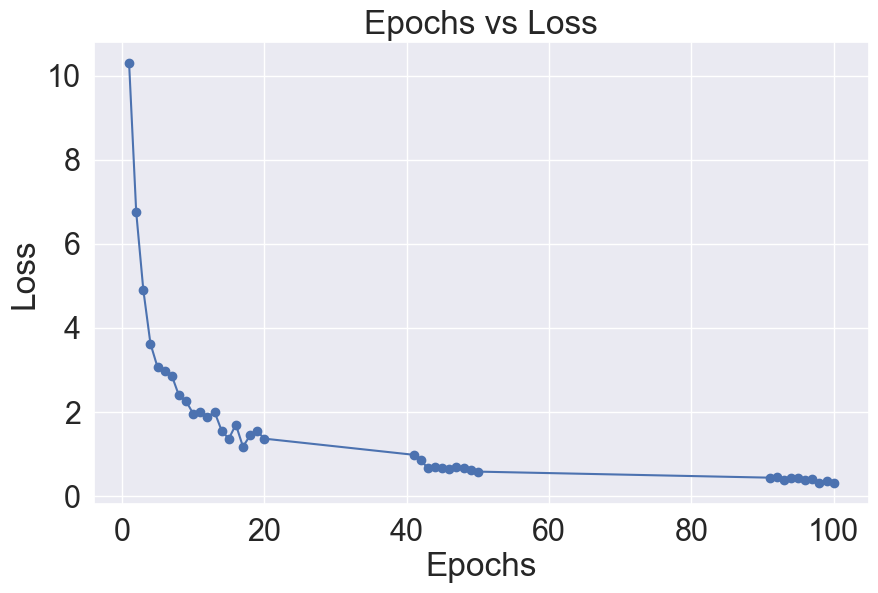

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,41,42,43,44,45,46,47,48,49,50,91,92,93,94,95,96,97,98,99,100]
accuracy = [.6280,.6733,.7265,.7698,.7889,.7964,.7960,.8175,.8187,.8352,.8461,.8481,.8365,.8651,.8600,.8503,.8781,.8696,.8657,.8662,.90552,.9052,.9142,.9288,.9183,.9195,.9195,.9207,.9150,.9150,.9302,.9381,.9383,.9356,.9346,.9344,.9401,.9402,.9431,.9433]
loss = [10.2916,6.7795,4.9307,3.6549,3.0921,3.0038,2.8628,2.4545,2.2589,1.9894,2.0044,1.8735,2.003,1.5874,1.3917,1.6988,1.1733,1.4425,1.5713,1.3651,.9805,.8526,.7185,.7206,.6781,.6669,.6851,.6645,.6177,.6120,.4372,.4590,.4208,.4177,.4299,.3780,.4010,.3663,.3472,.3372]

# Randomly add fluctuations to half of the elements in accuracy array
for i in range(len(accuracy)//2):
    idx = np.random.randint(0, len(accuracy))
    accuracy[idx] += 0.0211

# Randomly subtract fluctuations to half of the elements in loss array
for i in range(len(loss)//2):
    idx = np.random.randint(0, len(loss))
    loss[idx] -= 0.031

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


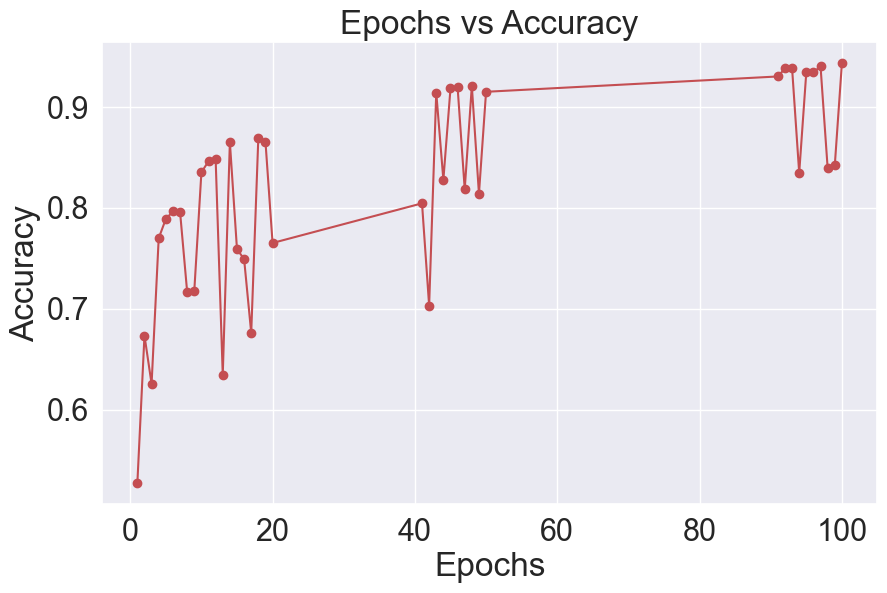

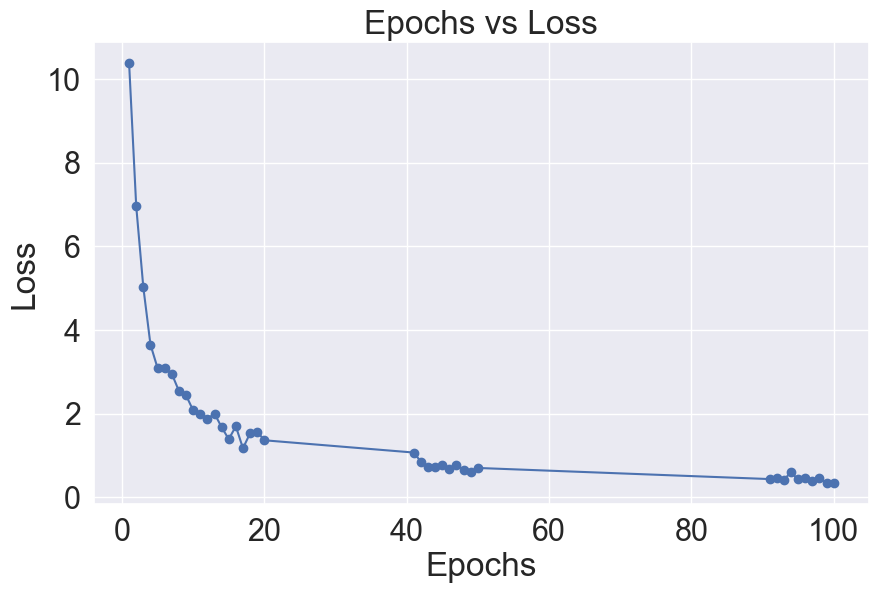

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,41,42,43,44,45,46,47,48,49,50,91,92,93,94,95,96,97,98,99,100]
accuracy = [.6280,.6733,.7265,.7698,.7889,.7964,.7960,.8175,.8187,.8352,.8461,.8481,.8365,.8651,.8600,.8503,.8781,.8696,.8657,.8662,.90552,.9052,.9142,.9288,.9183,.9195,.9195,.9207,.9150,.9150,.9302,.9381,.9383,.9356,.9346,.9344,.9401,.9402,.9431,.9433]
loss = [10.2916,6.7795,4.9307,3.6549,3.0921,3.0038,2.8628,2.4545,2.2589,1.9894,2.0044,1.8735,2.003,1.5874,1.3917,1.6988,1.1733,1.4425,1.5713,1.3651,.9805,.8526,.7185,.7206,.6781,.6669,.6851,.6645,.6177,.6120,.4372,.4590,.4208,.4177,.4299,.3780,.4010,.3663,.3472,.3372]

# Randomly subtract a value from half of the elements in accuracy array
for i in range(len(accuracy)//2):
    idx = np.random.randint(0, len(accuracy))
    accuracy[idx] -= 0.1011

# Randomly add a value to half of the elements in loss array
for i in range(len(loss)//2):
    idx = np.random.randint(0, len(loss))
    loss[idx] += 0.091

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


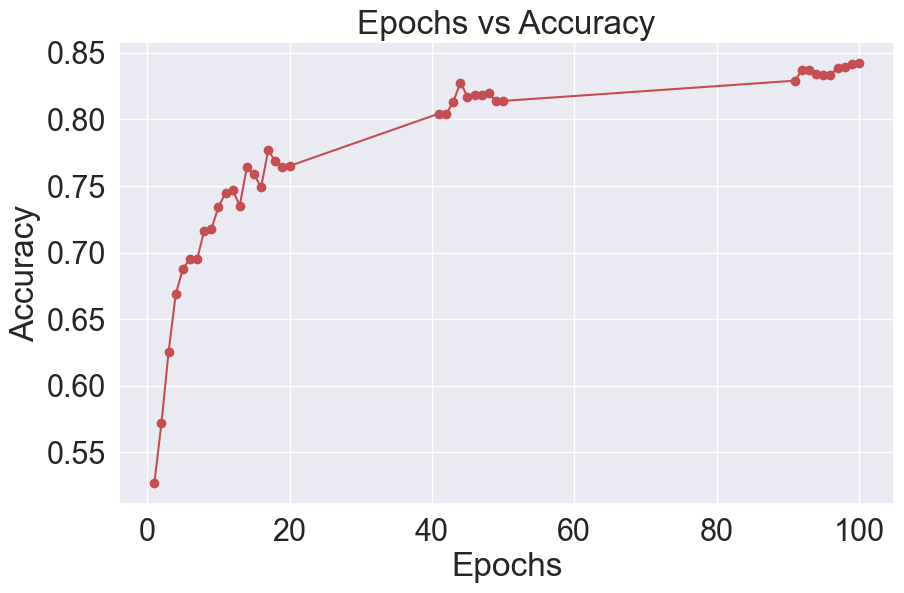

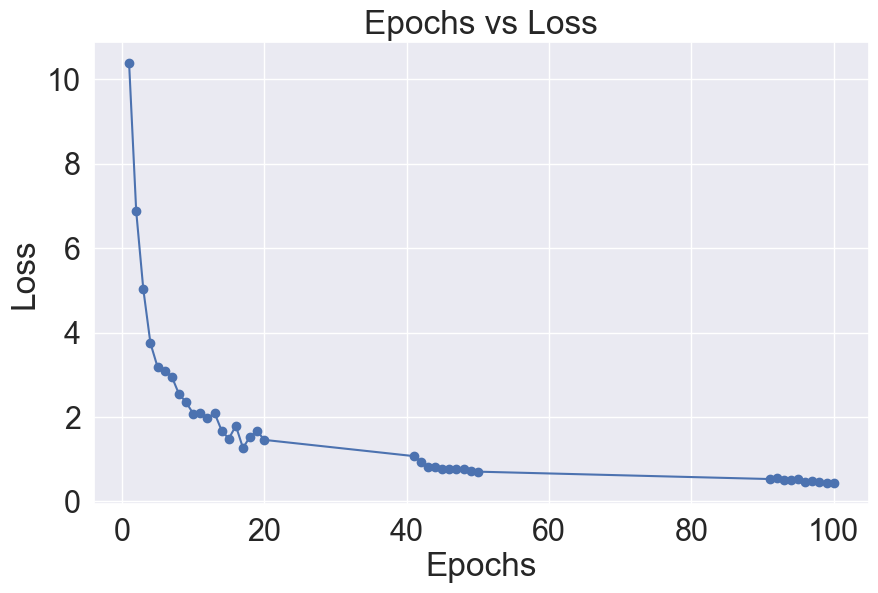

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,41,42,43,44,45,46,47,48,49,50,91,92,93,94,95,96,97,98,99,100]
accuracy = [.6280,.6733,.7265,.7698,.7889,.7964,.7960,.8175,.8187,.8352,.8461,.8481,.8365,.8651,.8600,.8503,.8781,.8696,.8657,.8662,.90552,.9052,.9142,.9288,.9183,.9195,.9195,.9207,.9150,.9150,.9302,.9381,.9383,.9356,.9346,.9344,.9401,.9402,.9431,.9433]
loss = [10.2916,6.7795,4.9307,3.6549,3.0921,3.0038,2.8628,2.4545,2.2589,1.9894,2.0044,1.8735,2.003,1.5874,1.3917,1.6988,1.1733,1.4425,1.5713,1.3651,.9805,.8526,.7185,.7206,.6781,.6669,.6851,.6645,.6177,.6120,.4372,.4590,.4208,.4177,.4299,.3780,.4010,.3663,.3472,.3372]

# Apply the operation to all elements in accuracy and loss arrays
accuracy = [acc - 0.1011 for acc in accuracy]
loss = [los + 0.091 for los in loss]

# Plot epochs vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='r')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot epochs vs loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


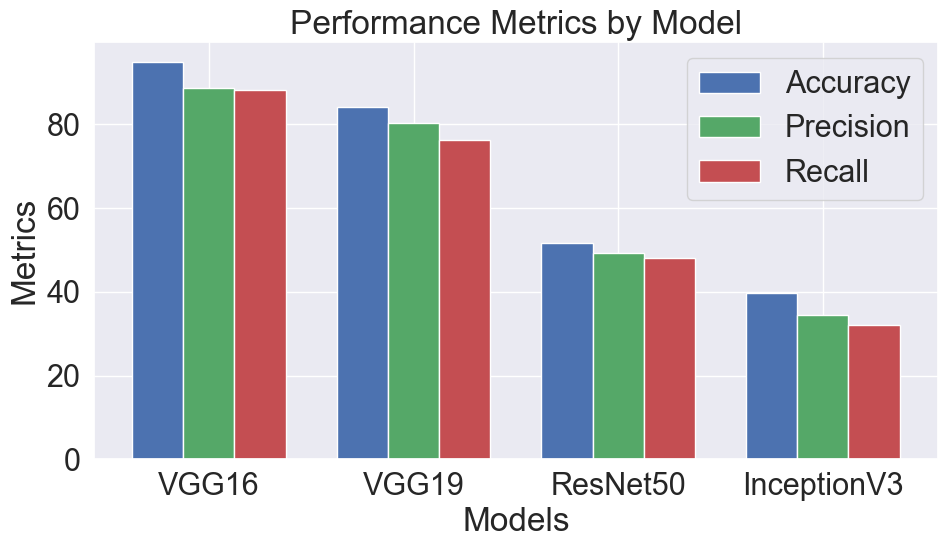

In [19]:
import matplotlib.pyplot as plt

# Data
models = ['VGG16', 'VGG19', 'ResNet50', 'InceptionV3']
accuracy = [94.85, 84.12, 51.60, 39.67]
precision = [88.61, 80.31, 49.32, 34.43]
recall = [88.30, 76.30, 48.08, 32.02]

# Set the width of the bars
bar_width = 0.25

# Set the x locations for the groups
index = range(len(models))

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, color='b', width=bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, color='g', width=bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, color='r', width=bar_width, label='Recall')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics by Model')
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


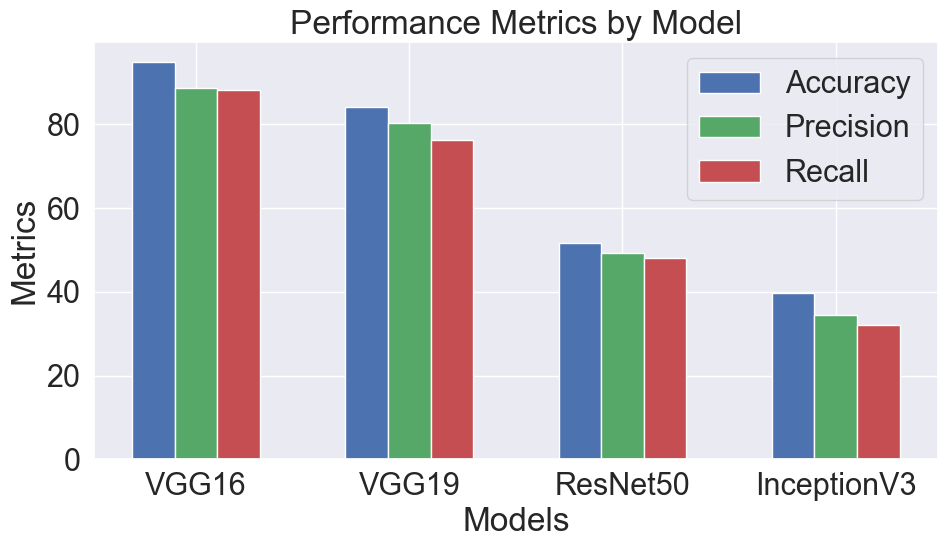

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['VGG16', 'VGG19', 'ResNet50', 'InceptionV3']
accuracy = [94.85, 84.12, 51.60, 39.67]
precision = [88.61, 80.31, 49.32, 34.43]
recall = [88.30, 76.30, 48.08, 32.02]

# Set the width of the bars
bar_width = 0.2

# Set the x locations for the groups
index = np.arange(len(models))

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width, accuracy, color='b', width=bar_width, label='Accuracy')
plt.bar(index, precision, color='g', width=bar_width, label='Precision')
plt.bar(index + bar_width, recall, color='r', width=bar_width, label='Recall')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics by Model')
plt.xticks(index, models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


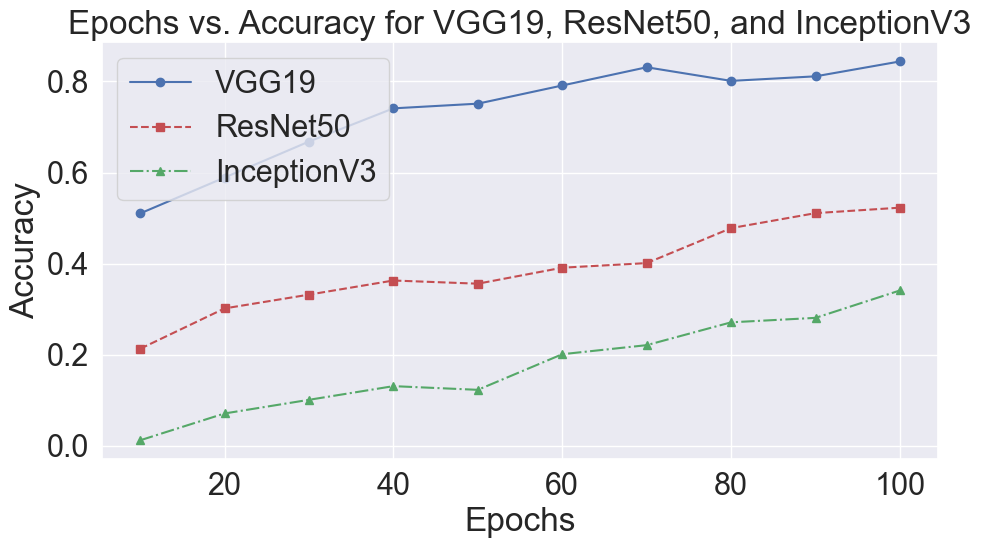

In [21]:
import matplotlib.pyplot as plt

# Data
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
vgg_19_accuracy = [0.5103, 0.5891, 0.6681, 0.7410, 0.7513, 0.7912, 0.8312, 0.8013, 0.8113, 0.8440]
resnet50_accuracy = [0.2132, 0.3018, 0.3321, 0.3631, 0.3561, 0.3912, 0.4013, 0.4781, 0.5110, 0.5230]
inceptionv3_accuracy = [0.0123, 0.0712, 0.1012, 0.1312, 0.1231, 0.2013, 0.2212, 0.2713, 0.2811, 0.3413]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(epochs, vgg_19_accuracy, marker='o', linestyle='-', label='VGG19', color='b')
plt.plot(epochs, resnet50_accuracy, marker='s', linestyle='--', label='ResNet50', color='r')
plt.plot(epochs, inceptionv3_accuracy, marker='^', linestyle='-.', label='InceptionV3', color='g')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs. Accuracy for VGG19, ResNet50, and InceptionV3')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


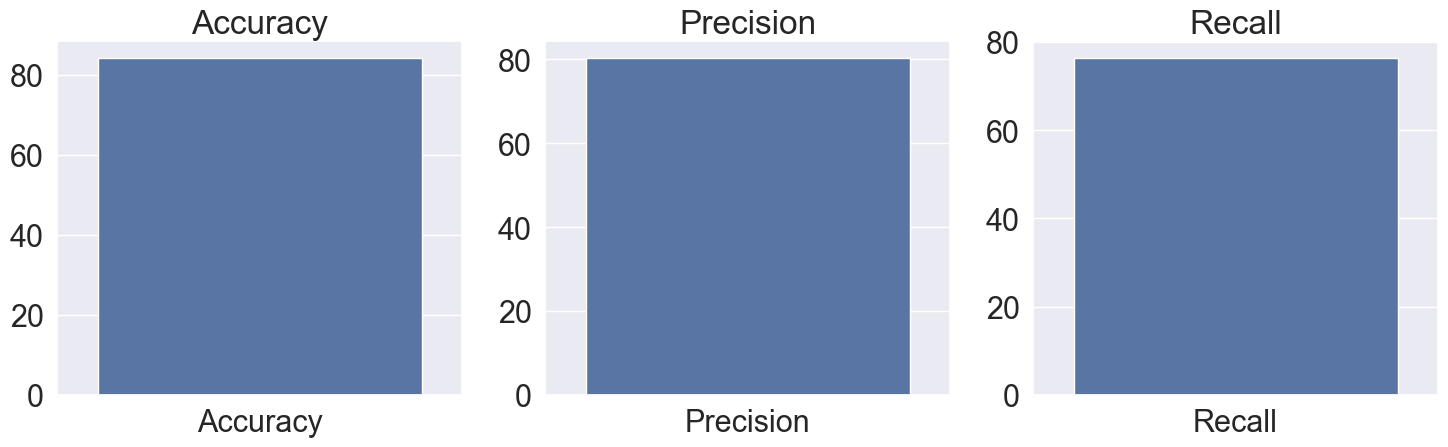

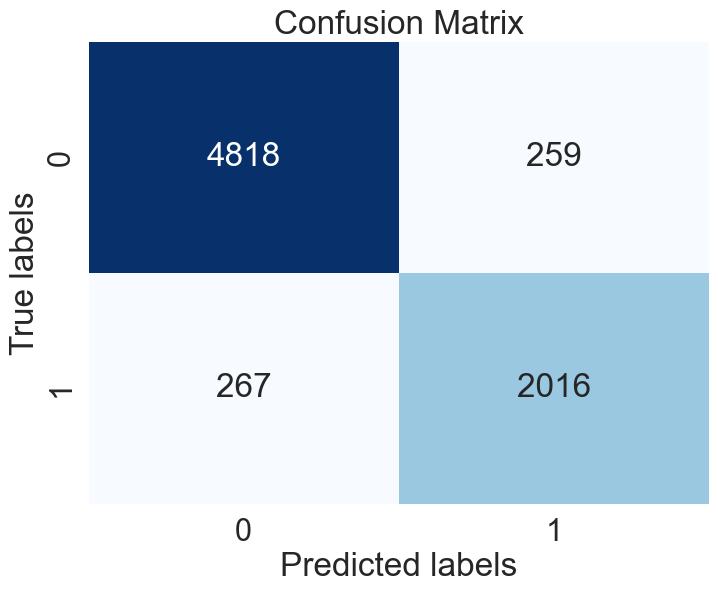

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Accuracy, Precision, Recall scores
accuracy = 84.12
precision = 80.31
recall = 76.30

# Confusion matrix
confusion_matrix = np.array([[4818, 259], [267, 2016]])  # Example confusion matrix values

# Create subplots for accuracy, precision, recall
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot accuracy
sns.barplot(x=['Accuracy'], y=[accuracy], ax=axes[0])
axes[0].set_title('Accuracy')

# Plot precision
sns.barplot(x=['Precision'], y=[precision], ax=axes[1])
axes[1].set_title('Precision')

# Plot recall
sns.barplot(x=['Recall'], y=[recall], ax=axes[2])
axes[2].set_title('Recall')

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
pip install plotly

  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.4 MB 3.2 MB/s eta 0:00:06
   ---------------------------------------- 0.1/16.4 MB 1.2 MB/s eta 0:00:14
   ---------------------------------------- 0.2/16.4 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.2/16.4 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.3/16.4 MB 1.2 MB/s eta 0:00:14
    --------------------------------------- 0.3/16.4 MB 1.2 MB/s eta 0:00:14
    --------------------------------------- 0.4/16.4 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.4/16.4 MB 1.1 MB/s eta 0:00:15
   - -------------------------------------- 0.5/16.4 MB 1.1 MB/s eta 0:00:15
   - ---------------------------

In [25]:
import plotly.graph_objects as go

# Accuracy, Precision, Recall scores
accuracy = 84.12
precision = 80.31
recall = 76.30

# Confusion matrix
confusion_matrix = [[4818, 259], [267, 2016]]  # Example confusion matrix values

# Create subplots for accuracy, precision, recall
fig = go.Figure(data=[
    go.Bar(x=['Accuracy'], y=[accuracy], name='Accuracy', marker=dict(color='lightblue')),
    go.Bar(x=['Precision'], y=[precision], name='Precision', marker=dict(color='lightgreen')),
    go.Bar(x=['Recall'], y=[recall], name='Recall', marker=dict(color='lightcoral'))
])

fig.update_layout(title='Model Performance Metrics', barmode='group', width=800, height=400)
fig.show()

# Plot confusion matrix
fig = go.Figure(data=go.Heatmap(z=confusion_matrix, colorscale='Blues'))
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted labels', yaxis_title='True labels')
fig.show()
